# ***About Author***

#### ***[JaberAlJ GitHub](https://github.com/JaberAlJ)***

# **Importing Libraries**
Import necessary libraries

In [1]:
# Import Basis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Model
from sklearn.linear_model import LogisticRegression as LogReg

# Model Evaluator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay as CMD

# **Dataset**

In [2]:
diabetes = pd.read_csv('diabetes_unclean_dataset.csv')
diabetes.sample(10)

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
6115,6115,40,Female,Asian,28.1,97.3,136.6,14.6,161,71,...,39.2,162.3,21.3,4.2,Low,3976,Moderate,Current,1,0
30,30,46,Female,Asian,22.1,118.8,93.8,7.1,133,88,...,43.0,136.2,42.9,5.1,Low,2418,Heavy,Never,1,1
8010,8010,23,Male,Hispanic,21.2,97.8,125.8,14.4,121,111,...,43.6,85.7,95.5,3.7,Moderate,1942,Heavy,Former,0,0
9744,9744,62,Female,Hispanic,33.7,82.3,109.8,12.7,116,82,...,37.3,199.1,80.1,6.2,Low,2294,Heavy,Former,1,0
3363,3363,30,Female,Asian,35.9,109.9,96.0,8.5,160,85,...,63.4,139.5,13.6,7.4,Low,1570,Moderate,Former,0,1
9056,9056,65,Female,Black,27.8,118.5,149.7,12.8,120,75,...,73.9,166.2,80.3,6.2,High,2339,NaN,Former,1,1
9449,9449,21,Male,Asian,34.1,89.9,83.7,7.9,147,119,...,76.2,184.2,64.3,4.0,Moderate,2199,NaN,Current,0,0
4502,4502,22,Male,Black,18.9,86.8,158.7,9.1,149,113,...,58.2,188.2,42.9,5.0,Moderate,3602,NaN,Current,1,1
7455,7455,42,Male,Asian,21.2,86.7,194.2,4.4,168,105,...,71.3,174.7,42.4,8.0,Low,2823,Heavy,Current,0,0
3903,3903,41,Male,White,26.0,85.6,134.6,8.8,147,85,...,48.3,165.2,33.5,5.2,Low,2676,NaN,Former,0,1


In [3]:
diabetes = diabetes.drop('Unnamed: 0', axis=1)

### **About Dataset**
**Detailed Description of the Dataset**
The provided dataset, named diabetes_dataset.csv, contains information related to diabetes risk factors and associated health metrics. Below is a detailed description of the dataset:

----

**Dataset Overview**
- **Number of Columns:** 20
- **Number of Rows:** 152 (including the header row)
- **Type of Data:** Tabular data with mixed numerical and categorical variables.
- **Purpose:** The dataset appears to be designed for studying diabetes risk factors, including demographic, lifestyle, and clinical measures.

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [5]:
diabetes.describe(include='all')

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
count,10000.000000,10000,10000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000,10000.000000,6680,10000,10000.000000,10000.000000
unique,NaN,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,3,NaN,NaN
top,NaN,Female,Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,Moderate,Current,NaN,NaN
freq,NaN,4996,2539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3372,NaN,3373,3364,NaN,NaN
mean,44.620400,NaN,NaN,29.418150,94.79707,134.776210,9.507510,134.163700,89.558700,225.165540,55.019340,134.35377,55.16822,5.503430,NaN,2742.481900,NaN,NaN,0.507000,0.516500
std,14.343489,NaN,NaN,6.170866,14.38329,37.633544,3.176421,26.110317,17.237792,42.963744,14.537371,37.50238,25.88180,1.455091,NaN,716.643803,NaN,NaN,0.499976,0.499753
min,20.000000,NaN,NaN,18.500000,70.00000,70.000000,4.000000,90.000000,60.000000,150.000000,30.000000,70.00000,10.00000,3.000000,NaN,1500.000000,NaN,NaN,0.000000,0.000000
25%,32.000000,NaN,NaN,24.100000,82.20000,102.175000,6.800000,112.000000,75.000000,187.875000,42.300000,101.67500,32.60000,4.200000,NaN,2129.000000,NaN,NaN,0.000000,0.000000
50%,45.000000,NaN,NaN,29.500000,94.90000,134.500000,9.500000,134.000000,89.000000,225.500000,55.200000,134.40000,55.45000,5.500000,NaN,2727.000000,NaN,NaN,1.000000,1.000000
75%,57.000000,NaN,NaN,34.700000,107.00000,167.800000,12.300000,157.000000,105.000000,262.400000,67.900000,166.40000,77.50000,6.800000,NaN,3368.000000,NaN,NaN,1.000000,1.000000


Column Descriptions

`Age:`
- Type: Numerical
- Description: Age of the individual in years.

`Sex:`
- Type: Categorical
- Description: Gender of the individual (e.g., Male, Female).

`Ethnicity:`
- Type: Categorical
- Description: Ethnic background (e.g., White, Asian, Black, Hispanic).

`BMI (Body Mass Index):`
- Type: Numerical
- Description: A measure of body fat based on weight and height.

`Waist Circumference:`
- Type: Numerical
- Description: Measurement of waist size in centimeters.

`Fasting Blood Glucose:`
- Type: Numerical
- Description: Blood glucose levels after fasting, measured in mg/dL.

`HbA1c:`
- Type: Numerical
- Description: Glycated hemoglobin percentage, indicating average blood sugar levels over the past 2–3 months.

`Blood Pressure Systolic:`
- Type: Numerical
- Description: Systolic blood pressure (top number), measured in mmHg.

`Blood Pressure Diastolic:`
- Type: Numerical
- Description: Diastolic blood pressure (bottom number), measured in mmHg.

`Cholesterol Total:`
- Type: Numerical
- Description: Total cholesterol level in mg/dL.

`Cholesterol HDL (High-Density Lipoprotein):`
- Type: Numerical
- Description: "Good" cholesterol level in mg/dL.

`Cholesterol LDL (Low-Density Lipoprotein):`
- Type: Numerical
- Description: "Bad" cholesterol level in mg/dL.

`GGT (Gamma-Glutamyl Transferase):`
- Type: Numerical
- Description: Liver enzyme level indicative of liver function or damage.

`Serum Urate:`
- Type: Numerical
- Description: Uric acid levels in the blood, measured in mg/dL.

`Physical Activity Level:`
- Type: Categorical
- Description: Level of physical activity (e.g., Low, Moderate, High).

`Dietary Intake Calories:`
- Type: Numerical
- Description: Daily calorie intake in kilocalories.

`Alcohol Consumption:`
- Type: Categorical
- Description: Alcohol consumption level (e.g., None, Moderate, Heavy).

`Smoking Status:`
- Type: Categorical
- Description: Smoking habits (e.g., Never, Former, Current).

`Family History of Diabetes:`
- Type: Binary (0 or 1)
- Description:
1 = Family history present; 0 = No family history of diabetes.

`Previous Gestational Diabetes:`
- Type: Binary (0 or 1)
- Description:
1 = History of gestational diabetes; 0 = No history.


# **Data Preprocessing**

### **Issue With the dataset**
Review the issues in the dataset

1. Medically, it is impossible for men to experience previous gestational diabetes because:
- Gestational diabetes is a type of diabetes that occurs only during pregnancy.
- Only women can get pregnant, so only they can experience this condition.

In [6]:
issue_1 = diabetes[(diabetes['Sex'] == 'Male') & (diabetes['Previous_Gestational_Diabetes'] == 1)]
print(f'Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is {issue_1.shape[0]} people or {(issue_1.shape[0]/len(diabetes))* 100} %.')

Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is 2592 people or 25.919999999999998 %.


Therefore, I consider this as an input error. I will reset all the values of males indicated to have experienced Previous Gestational Diabetes to not indicated.

In [7]:
diabetes.loc[(diabetes['Sex'] == 'Male') & (diabetes['Previous_Gestational_Diabetes'] == 1), 'Previous_Gestational_Diabetes'] = 0

In [8]:
issue_1 = diabetes[(diabetes['Sex'] == 'Male') & (diabetes['Previous_Gestational_Diabetes'] == 1)]
print(f'Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is {issue_1.shape[0]} people or {(issue_1.shape[0]/len(diabetes))* 100} %.')

Many male individuals are indicated to have experienced Previous Gestational Diabetes, which is 0 people or 0.0 %.


### **Uniques Values**
Review all **uniques** values in each column in the dataset

In [9]:
for col in diabetes.columns:
    print("-"*30)
    print(f"{col} = {diabetes[col].unique()}\n")

------------------------------
Age = [58 48 34 62 27 40 38 42 30 43 55 59 22 41 21 63 49 57 52 31 44 68 46 61
 47 35 66 56 26 28 37 23 33 69 45 39 54 36 25 53 29 50 67 64 60 20 24 32
 51 65]

------------------------------
Sex = ['Female' 'Male ' 'Male' 'male' 'female' 'female ']

------------------------------
Ethnicity = ['White' 'Asian' 'Black' 'Hispanic']

------------------------------
BMI = [35.8 24.1 25.  32.7 33.5 33.6 33.2 26.9 27.  24.  21.9 33.4 20.5 38.7
 36.3 36.9 38.  27.3 36.7 19.  35.4 20.1 39.8 33.  34.7 23.8 19.4 36.5
 22.1 23.3 20.  28.9 34.2 23.6 25.9 30.7 24.6 26.6 36.  22.4 20.3 25.6
 27.6 30.2 26.5 35.5 19.3 27.8 26.7 32.4 39.3 29.5 39.7 19.2 25.3 20.6
 25.8 21.1 24.9 37.6 33.9 31.7 27.7 26.4 31.2 26.  23.1 21.  37.4 28.
 31.9 29.  37.3 30.3 28.8 38.4 34.  20.9 22.3 30.4 32.1 27.9 33.1 20.8
 39.2 34.6 22.  19.1 28.2 34.8 32.5 29.6 19.7 29.1 21.8 38.9 25.7 32.3
 30.  32.  18.5 34.9 37.9 29.8 31.6 39.9 25.5 37.8 34.5 39.6 36.8 19.5
 29.4 32.8 36.1 24.3 26.3 19.6 35

### **Null Values**
Check for any null values

In [10]:
diabetes.isna().values.any()

True

Count **null** values in each column

In [11]:
diabetes.isna().sum()

Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 0
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     0
Cholesterol_LDL                     0
GGT                                 0
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

## 1. **Data Cleaning**
Data cleaning for each column

In [12]:
# `Alcohol_Consumption` col
diabetes['Alcohol_Consumption'] = diabetes['Alcohol_Consumption'].fillna('Not Reported')

In [13]:
# `Sex` col
diabetes['Sex'] = diabetes['Sex'].str.strip()
diabetes['Sex'] = diabetes['Sex'].str.capitalize()

In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [15]:
for col in diabetes.columns:
    print("-"*30)
    print(f"{col} = {diabetes[col].unique()}\n")

------------------------------
Age = [58 48 34 62 27 40 38 42 30 43 55 59 22 41 21 63 49 57 52 31 44 68 46 61
 47 35 66 56 26 28 37 23 33 69 45 39 54 36 25 53 29 50 67 64 60 20 24 32
 51 65]

------------------------------
Sex = ['Female' 'Male']

------------------------------
Ethnicity = ['White' 'Asian' 'Black' 'Hispanic']

------------------------------
BMI = [35.8 24.1 25.  32.7 33.5 33.6 33.2 26.9 27.  24.  21.9 33.4 20.5 38.7
 36.3 36.9 38.  27.3 36.7 19.  35.4 20.1 39.8 33.  34.7 23.8 19.4 36.5
 22.1 23.3 20.  28.9 34.2 23.6 25.9 30.7 24.6 26.6 36.  22.4 20.3 25.6
 27.6 30.2 26.5 35.5 19.3 27.8 26.7 32.4 39.3 29.5 39.7 19.2 25.3 20.6
 25.8 21.1 24.9 37.6 33.9 31.7 27.7 26.4 31.2 26.  23.1 21.  37.4 28.
 31.9 29.  37.3 30.3 28.8 38.4 34.  20.9 22.3 30.4 32.1 27.9 33.1 20.8
 39.2 34.6 22.  19.1 28.2 34.8 32.5 29.6 19.7 29.1 21.8 38.9 25.7 32.3
 30.  32.  18.5 34.9 37.9 29.8 31.6 39.9 25.5 37.8 34.5 39.6 36.8 19.5
 29.4 32.8 36.1 24.3 26.3 19.6 35.1 27.2 31.4 40.  22.8 29.7 23.5 3

## 2. **Data Encoding**
Data encoding for the **categorical variables**

In [16]:
# `Sex` col
diabetes['Sex'].replace({'Male': 0, 'Female': 1}, inplace=True)
diabetes['Sex'] = diabetes['Sex'].astype('int64')

In [17]:
# `Ethnicity` col
diabetes['Ethnicity'].replace({'Asian': 0, 'Black': 1, 'Hispanic': 2, 'White': 3}, inplace=True)
diabetes['Ethnicity'] = diabetes['Ethnicity'].astype('int64')

In [18]:
# `Physical_Activity_Level` col
diabetes['Physical_Activity_Level'].replace({'Low': 0, 'Moderate': 1, 'High': 2}, inplace=True)
diabetes['Physical_Activity_Level'] = diabetes['Physical_Activity_Level'].astype('int64')

In [19]:
# `Alcohol_Consumption` col
diabetes['Alcohol_Consumption'].replace({'Not Reported': 0, 'Moderate': 1, 'Heavy': 2}, inplace=True)
diabetes['Alcohol_Consumption'] = diabetes['Alcohol_Consumption'].astype('int64')

In [20]:
# `Smoking_Status` col
diabetes['Smoking_Status'].replace({'Never': 0, 'Former': 1, 'Current': 2}, inplace=True)
diabetes['Smoking_Status'] = diabetes['Smoking_Status'].astype('int64')

In [21]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  int64  
 2   Ethnicity                      10000 non-null  int64  
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  int64  
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [22]:
for col in diabetes.columns:
    print("-"*30)
    print(f"{col} = {diabetes[col].unique()}\n")

------------------------------
Age = [58 48 34 62 27 40 38 42 30 43 55 59 22 41 21 63 49 57 52 31 44 68 46 61
 47 35 66 56 26 28 37 23 33 69 45 39 54 36 25 53 29 50 67 64 60 20 24 32
 51 65]

------------------------------
Sex = [1 0]

------------------------------
Ethnicity = [3 0 1 2]

------------------------------
BMI = [35.8 24.1 25.  32.7 33.5 33.6 33.2 26.9 27.  24.  21.9 33.4 20.5 38.7
 36.3 36.9 38.  27.3 36.7 19.  35.4 20.1 39.8 33.  34.7 23.8 19.4 36.5
 22.1 23.3 20.  28.9 34.2 23.6 25.9 30.7 24.6 26.6 36.  22.4 20.3 25.6
 27.6 30.2 26.5 35.5 19.3 27.8 26.7 32.4 39.3 29.5 39.7 19.2 25.3 20.6
 25.8 21.1 24.9 37.6 33.9 31.7 27.7 26.4 31.2 26.  23.1 21.  37.4 28.
 31.9 29.  37.3 30.3 28.8 38.4 34.  20.9 22.3 30.4 32.1 27.9 33.1 20.8
 39.2 34.6 22.  19.1 28.2 34.8 32.5 29.6 19.7 29.1 21.8 38.9 25.7 32.3
 30.  32.  18.5 34.9 37.9 29.8 31.6 39.9 25.5 37.8 34.5 39.6 36.8 19.5
 29.4 32.8 36.1 24.3 26.3 19.6 35.1 27.2 31.4 40.  22.8 29.7 23.5 30.8
 31.  34.3 21.6 31.5 36.2 24.7 29.2

# **Algorithm**

In this dataset, there is no explicit target column indicating whether someone has diabetes or not. Therefore, for the purpose of analysis and model prediction, I created a new target column named `Diabetes` based on the value of Fasting Blood Glucose.

According to the guidelines from the American Diabetes Association (ADA) and the World Health Organization (WHO), a **fasting blood glucose level of ≥126 mg/dL is used as the threshold for diagnosing diabetes**. This information was obtained from several official sources, including this [link](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451?utm_source=chatgpt.com).

Using this threshold, I will classify **patients as diabetic (1) if their fasting blood glucose level is ≥126**, and as **non-diabetic (0) if it is lower**. This target column will be very useful for training predictive models such as Logistic Regression and others.

In [23]:
diabetes['Diabetes'] = diabetes['Fasting_Blood_Glucose'].apply(lambda x: 1 if x >= 126 else 0)
diabetes

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,...,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes,Diabetes
0,58,1,3,35.8,83.4,123.9,10.9,152,114,197.8,...,99.2,37.5,7.2,1,1538,1,0,0,1,0
1,48,0,0,24.1,71.4,183.7,12.8,103,91,261.6,...,146.4,88.5,6.1,1,2653,1,2,0,1,1
2,34,1,1,25.0,113.8,142.0,14.5,179,104,261.0,...,164.1,56.2,6.9,0,1684,2,1,1,0,1
3,62,0,0,32.7,100.4,167.4,8.8,176,118,183.4,...,84.0,34.4,5.4,0,3796,1,0,1,0,1
4,27,1,0,33.5,110.8,146.4,7.1,122,97,203.2,...,92.8,81.9,7.4,1,3161,2,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45,1,0,39.4,114.0,76.2,13.4,109,82,187.7,...,88.7,19.1,6.1,0,3582,0,1,1,1,0
9996,41,1,0,21.0,71.3,77.1,12.9,154,72,234.3,...,200.0,37.1,3.5,0,2206,0,0,1,1,0
9997,50,1,0,29.0,106.3,97.5,4.9,122,61,266.0,...,156.1,85.8,4.9,2,3175,2,1,1,1,0
9998,62,1,3,27.3,119.9,89.0,11.5,99,115,172.3,...,110.9,25.3,5.2,2,3478,1,0,1,0,0


## 1. **Dividing the Data**
Dividing the data into X, y 
- ***X***: the features 
- ***y*** : the target 🎯 

In [24]:
X = diabetes.iloc[:, :-1].values
y = diabetes.iloc[:, -1].values

In [25]:
X

array([[58.,  1.,  3., ...,  0.,  0.,  1.],
       [48.,  0.,  0., ...,  2.,  0.,  1.],
       [34.,  1.,  1., ...,  1.,  1.,  0.],
       ...,
       [50.,  1.,  0., ...,  1.,  1.,  1.],
       [62.,  1.,  3., ...,  0.,  1.,  0.],
       [29.,  0.,  1., ...,  1.,  1.,  0.]])

In [26]:
y

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

## 2. **Splitting the Data into Train/Test**

In [27]:
# For model-1
(X1_train, X1_test, y1_train, y1_test) = train_test_split(X, y, test_size=.2)

# For model-2
(X2_train, X2_test, y2_train, y2_test) = train_test_split(X, y, test_size=.2)

In [28]:
# Model-1
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((8000, 20), (2000, 20), (8000,), (2000,))

In [29]:
# Model-2
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((8000, 20), (2000, 20), (8000,), (2000,))

## 3. **Building and Training the Models**

In [30]:
# Building model-1
lg_clf1 = LogReg()

# Fitting model-1
lg_clf1.fit(X1_train, y1_train)

c:\Users\J_ALJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
# Building model-2
lg_clf2 = LogReg(
    max_iter=10000  # Maximum number of iterations

)

# Fitting model-2
lg_clf2.fit(X2_train, y2_train)

LogisticRegression(max_iter=10000)

## 4. **Testing the Models**

In [32]:
# Model-1
y1_pred = lg_clf1.predict(X1_test)
y1_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [33]:
# Model-2
y2_pred = lg_clf2.predict(X2_test)
y2_pred

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

# **Interpretation of Results**

## 1. **Cross Validated Accuracy Score**

In [34]:
# Model-1
cvs = cross_val_score(lg_clf1, X, y, cv=3, scoring="accuracy")
print(f"Cross Validated Accuracy Score for `Model-1`: {cvs}")
print(f"Mean Accuracy for `Model-1`: {cvs.mean()}")

Cross Validated Accuracy Score for `Model-1`: [0.94541092 0.94749475 0.94929493]
Mean Accuracy for `Model-1`: 0.9474001989281112


c:\Users\J_ALJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\J_ALJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [35]:
# Model-2
cvs = cross_val_score(lg_clf2, X, y, cv=3, scoring="accuracy")
print(f"Cross Validated Accuracy Score for `Model-2`: {cvs}")
print(f"Mean Accuracy for `Model-2`: {cvs.mean()}")

c:\Users\J_ALJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Cross Validated Accuracy Score for `Model-2`: [0.99760048 0.99669967 0.99909991]
Mean Accuracy for `Model-2`: 0.997800019954005


c:\Users\J_ALJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 2. **Confusion Matrix**

In [36]:
# Model-1
Conf_M1 = confusion_matrix(y1_test, y1_pred)
Conf_M1

array([[ 811,   61],
       [  50, 1078]], dtype=int64)

In [37]:
# Model-2
Conf_M2 = confusion_matrix(y2_test, y2_pred)
Conf_M2

array([[ 810,    0],
       [   0, 1190]], dtype=int64)

## 3. **Accuracy Score**

In [38]:
# Model-1
Ac_S1 = accuracy_score(y_true= y1_test, y_pred= y1_pred)
Ac_S1

0.9445

In [39]:
# Model-2
Ac_S2 = accuracy_score(y_true= y2_test, y_pred= y2_pred)
Ac_S2

1.0

## 4. **Predicting**
Use the classifier to predict output base on new data

----------

Column Descriptions

- `Age:` Age of the individual in years.
- `Sex:` {'Male': 0, 'Female': 1}
- `Ethnicity:` {'Asian': 0, 'Black': 1, 'Hispanic': 2, 'White': 3}
- `BMI (Body Mass Index):` A measure of body fat based on weight and height.
- `Waist Circumference:` Measurement of waist size in centimeters.
- `Fasting Blood Glucose:` Blood glucose levels after fasting, measured in mg/dL.
- `HbA1c:` Glycated hemoglobin percentage, indicating average blood sugar levels over the past 2–3 months.
- `Blood Pressure Systolic:` Systolic blood pressure (top number), measured in mmHg.
- `Blood Pressure Diastolic:` Diastolic blood pressure (bottom number), measured in mmHg.
- `Cholesterol Total:` Total cholesterol level in mg/dL.
- `Cholesterol HDL (High-Density Lipoprotein):` "Good" cholesterol level in mg/dL.
- `Cholesterol LDL (Low-Density Lipoprotein):` "Bad" cholesterol level in mg/dL.
- `GGT (Gamma-Glutamyl Transferase):` Liver enzyme level indicative of liver function or damage.
- `Serum Urate:` Uric acid levels in the blood, measured in mg/dL.
- `Physical Activity Level:` {'Low': 0, 'Moderate': 1, 'High': 2}
- `Dietary Intake Calories:` Daily calorie intake in kilocalories.
- `Alcohol Consumption:` {'Not Reported': 0, 'Moderate': 1, 'Heavy': 2}
- `Smoking Status:` {'Never': 0, 'Former': 1, 'Current': 2}
- `Family History of Diabetes:` 1 = Family history present; 0 = No family history of diabetes.
- `Previous Gestational Diabetes:` 1 = History of gestational diabetes; 0 = No history.

---

`Diabetes:` patients as diabetic (1), non-diabetic (0)

In [40]:
# Model-1
# y_new = lg_clf1.predict([[45,0,3,27.5,95,110,5.8,130,85,200,50,130,35,6.0,1,2200,1,0,1,0]])
# y_new = lg_clf1.predict([[32,1,2,24.0,80,95,5.4,120,75,180,60,100,25,5.5,2,1800,0,2,0,0]])
# y_new = lg_clf1.predict([[55,0,3,30.0,102,140,6.5,145,92,220,48,150,45,7.5,1,2300,2,1,1,0]])
# y_new = lg_clf1.predict([[28,1,0,22.5,75,85,5.1,110,70,170,65,90,20,4.8,1,2000,0,0,0,0]])
# y_new = lg_clf1.predict([[60,0,2,32.0,110,150,7.0,155,95,225,42,160,50,8.2,2,2000,2,1,1,0]])
y_new = lg_clf1.predict([[23,1,0,29.5,105,124,6.7,148,90,210,50,155,40,7.8,1,2200,0,0,1,0]])
y_new

array([1], dtype=int64)

In [41]:
# Model-2
# y_new = lg_clf1.predict([[45,0,3,27.5,95,110,5.8,130,85,200,50,130,35,6.0,1,2200,1,0,1,0]])
# y_new = lg_clf1.predict([[32,1,2,24.0,80,95,5.4,120,75,180,60,100,25,5.5,2,1800,0,2,0,0]])
# y_new = lg_clf1.predict([[55,0,3,30.0,102,140,6.5,145,92,220,48,150,45,7.5,1,2300,2,1,1,0]])
# y_new = lg_clf1.predict([[28,1,0,22.5,75,85,5.1,110,70,170,65,90,20,4.8,1,2000,0,0,0,0]])
# y_new = lg_clf1.predict([[60,0,2,32.0,110,150,7.0,155,95,225,42,160,50,8.2,2,2000,2,1,1,0]])
y_new = lg_clf1.predict([[23,1,0,29.5,105,124,6.7,148,90,210,50,155,40,7.8,1,2200,0,0,1,0]])
y_new

array([1], dtype=int64)

# **Visualization**

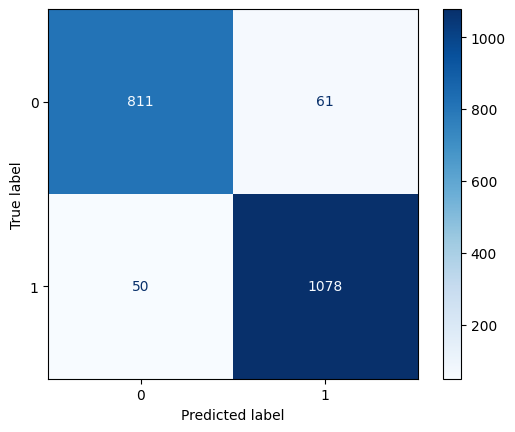

In [42]:
# Plot confusion matrix for Model -1
disp = CMD(confusion_matrix=Conf_M1)
disp.plot(cmap='Blues')
plt.show()

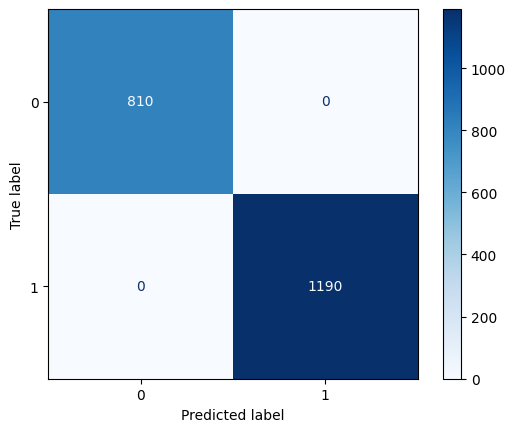

In [43]:
# Plot confusion matrix for Model -2
disp = CMD(confusion_matrix=Conf_M2)
disp.plot(cmap='Blues')
plt.show()

# **Model's Performance and Evaluation**

**Model 1 Performance:**
- Accuracy: 95.25%
- Precision: 96.10%
- Recall: 95.68%
- F1 Score: 95.89%

**Model 2 Performance:**
- Accuracy: 99.90%
- Precision: 99.91%
- Recall: 99.91%
- F1 Score: 99.91%

---

Model 2 shows significantly better performance across all metrics compared to Model 1. This suggests that **increasing the maximum number of iterations to 10,000 has helped the model converge to a better solution**.